In [207]:
import pandas as pd
import exiftool 
import glob
import os
import shutil
%matplotlib inline

# scan downloaded images

In [2]:
sourcedir = r'E:\HSV\Dig Stills\**'
files = glob.glob(sourcedir+os.path.sep+r'*.JPG',recursive=True)
with exiftool.ExifTool(r'E:\HSV\exiftool(-k -api largefilesupport=1).exe') as et:
    metadata = et.get_metadata_batch(files)
stills = pd.DataFrame(metadata)
pd.set_option('display.max_columns', 500)
stills =stills[['Composite:SubSecCreateDate','EXIF:SerialNumber','File:Directory','File:FileName']]
stills.columns = ['TimeStamp','SerialNumber','Path','File']

stills.TimeStamp = pd.to_datetime(stills.TimeStamp,format="%Y:%m:%d %H:%M:%S.%f")
stills.set_index('TimeStamp',inplace=True)
stills.to_csv(r'E:\HSV\hsv_images.csv')
stills.head()

SerialNumber                          Path  \
TimeStamp                                                             
2019-03-20 06:30:15.520  105031003201  E:/HSV/Dig Stills/2019_03_20   
2019-03-20 06:30:21.690  105031003201  E:/HSV/Dig Stills/2019_03_20   
2019-03-20 06:30:26.690  105031003201  E:/HSV/Dig Stills/2019_03_20   
2019-03-20 06:30:31.660  105031003201  E:/HSV/Dig Stills/2019_03_20   
2019-03-20 06:30:36.630  105031003201  E:/HSV/Dig Stills/2019_03_20   

                                 File  
TimeStamp                              
2019-03-20 06:30:15.520  IMG_0001.JPG  
2019-03-20 06:30:21.690  IMG_0002.JPG  
2019-03-20 06:30:26.690  IMG_0003.JPG  
2019-03-20 06:30:31.660  IMG_0004.JPG  
2019-03-20 06:30:36.630  IMG_0005.JPG

In [114]:
sourcedir = r'E:\HSV\Video\**'
files = glob.glob(sourcedir+os.path.sep+r'*.mp4',recursive=True)
with exiftool.ExifTool(r'E:\HSV\exiftool(-k -api largefilesupport=1).exe') as et:
    metadata = et.get_metadata_batch(files)
video = pd.DataFrame(metadata)
pd.set_option('display.max_columns', 500)
video =video[['QuickTime:TrackCreateDate','QuickTime:TrackDuration','File:Directory','File:FileName']]
video.columns = ['TimeStampMeta','Duration','Path','File']
video.TimeStampMeta =  pd.to_datetime(video.TimeStampMeta,format="%Y:%m:%d %H:%M:%S")
temp =video.File.str.split('-',expand=True)
video['TimeStamp']=pd.to_datetime(temp[[3,4,5,6]].apply(' '.join, 1),format='%Y %m %d %Hh%Mm%Ss')
video.Duration = pd.to_timedelta(video.Duration,unit='s')
video.TimeStampMeta = video.TimeStampMeta - video.Duration

video.set_index('TimeStamp',inplace=True)
video.to_csv(r'E:\HSV\hsv_video.csv')
video.head()

TimeStampMeta        Duration  \
TimeStamp                                                           
2019-03-26 03:41:39 2019-03-26 03:41:50.137777778 00:13:33.862222   
2019-03-28 06:18:50 2019-03-28 06:18:50.497233334 00:27:34.502766   
2019-03-28 06:58:51 2019-03-28 06:58:50.754555556 00:27:50.245444   
2019-03-28 04:51:44 2019-03-28 04:51:44.439966667 00:27:13.560033   
2019-03-29 04:20:58 2019-03-29 04:20:58.789777778 00:24:39.210222   

                             Path  \
TimeStamp                           
2019-03-26 03:41:39  E:/HSV/Video   
2019-03-28 06:18:50  E:/HSV/Video   
2019-03-28 06:58:51  E:/HSV/Video   
2019-03-28 04:51:44  E:/HSV/Video   
2019-03-29 04:20:58  E:/HSV/Video   

                                                                  File  
TimeStamp                                                               
2019-03-26 03:41:39  2601-vlc-record-2019-03-26-03h41m39s-rtsp___19...  
2019-03-28 06:18:50  2803-vlc-record-2019-03-28-06h18m50s-rtsp___19...  
2019-03-28 06:58:51  2812-vlc-record-2019-03-28-06h58m51s-rtsp___19...  
2019-03-28 04:51:44  2818-vlc-record-2019-03-28-04h51m44s-rtsp___19...  
2019-03-29 04:20:58  2904-vlc-record-2019-03-29-04h20m58s-rtsp___19...

# load stills and video cache

In [117]:
stills = pd.read_csv(r'E:\HSV\hsv_images.csv',index_col='TimeStamp',parse_dates=['TimeStamp'])
videos = pd.read_csv(r'E:\HSV\hsv_video.csv',index_col='TimeStamp',parse_dates=['TimeStamp','Duration'])
videos.head()

TimeStampMeta                   Duration  \
TimeStamp                                                                       
2019-03-26 03:41:39  2019-03-26 03:41:50.137777778  0 days 00:13:33.862222222   
2019-03-28 06:18:50  2019-03-28 06:18:50.497233334  0 days 00:27:34.502766666   
2019-03-28 06:58:51  2019-03-28 06:58:50.754555556  0 days 00:27:50.245444444   
2019-03-28 04:51:44  2019-03-28 04:51:44.439966667  0 days 00:27:13.560033333   
2019-03-29 04:20:58  2019-03-29 04:20:58.789777778  0 days 00:24:39.210222222   

                             Path  \
TimeStamp                           
2019-03-26 03:41:39  E:/HSV/Video   
2019-03-28 06:18:50  E:/HSV/Video   
2019-03-28 06:58:51  E:/HSV/Video   
2019-03-28 04:51:44  E:/HSV/Video   
2019-03-29 04:20:58  E:/HSV/Video   

                                                                  File  
TimeStamp                                                               
2019-03-26 03:41:39  2601-vlc-record-2019-03-26-03h41m39s-rtsp___19...  
2019-03-28 06:18:50  2803-vlc-record-2019-03-28-06h18m50s-rtsp___19...  
2019-03-28 06:58:51  2812-vlc-record-2019-03-28-06h58m51s-rtsp___19...  
2019-03-28 04:51:44  2818-vlc-record-2019-03-28-04h51m44s-rtsp___19...  
2019-03-29 04:20:58  2904-vlc-record-2019-03-29-04h20m58s-rtsp___19...

In [185]:
import json

def read_logfile(file,test=False):
    if test:
        t=0
        with open(file) as f:
            for line in f:
                    t=t+1
                    print(t)
                    j_content = json.loads(line)


    print(file)
    log = pd.read_json(file,lines=True)
    deployment = log[log.message=="csiro.project.deployment.metadata"].iloc[0]
    deployment = deployment['data']
    site_id =deployment['site_id']
    voyage_number =deployment['voyage_number']
    operation_number =deployment['operation_number']
    log['operation']=operation_number
    log['site_id']=site_id
    log['Voyage']=voyage_number
    print ('Voyage    :',voyage_number)
    print ('Operation :',operation_number)
    print ('site      :',site_id)
    log.set_index('timestamp',inplace=True)
    camera = log[log.message=="hsv.canon.dsc.metadata"].iloc[0]
    return log,deployment,camera

def openfile_dialog(title,default_dir='.'):
    from PyQt5 import QtGui
    from PyQt5 import QtGui, QtWidgets
    app = QtWidgets.QApplication([dir])
    fname = QtWidgets.QFileDialog.getOpenFileName(None, title,default_dir)
    return fname

def make_file_name(item):
    item.new_file = item.Platform + '_'+ item.Camera_name+'_' + item.Voyage + '_'+ \
                        str(item.Operation_identifier).zfill(3) + '_'+ item.name.strftime('%Y%m%dT%H%M%SZ')+\
                        '_'+str(item.image_count).zfill(4)+os.path.splitext(os.path.split(item.File)[1])[1]
    return item  

def move_it(item,doit=False):
    if os.path.exists(item.OldPath):
        print ('Moving %s to %s' % (item.OldPath,item.NewPath))
        if doit:
            shutil.move(item.OldPath,item.NewPath)

# move the files to there final resting place

In [186]:


sourcedir = openfile_dialog("Select log file....","E:\HSV\Log Files\clean") 
log,deployment,camera = read_logfile(sourcedir[0])
destinationdir = r'E:\LI2019_V05\\'
destinationroot  = destinationdir +deployment['platform'].upper()+os.path.sep \
                   +deployment['voyage_number']+'_' \
                   +str(int(deployment['operation_number'])).zfill(3)+os.path.sep
stillsdestination = destinationroot+'stills'+os.path.sep
videodestination = destinationroot+'video'+os.path.sep
logdestination = destinationroot+'log'+os.path.sep
productdestination = destinationroot+'product'+os.path.sep
reportdestination = destinationroot+'report'+os.path.sep  
os.makedirs(reportdestination, exist_ok=True)
os.makedirs(productdestination, exist_ok=True)
os.makedirs(logdestination, exist_ok=True)
os.makedirs(stillsdestination, exist_ok=True)
os.makedirs(videodestination, exist_ok=True)
print ("destination root %s" %(destinationroot))
print ("destination stills %s" %(stillsdestination))
print ("destination video %s" %(videodestination))
print ("destination log %s" %(logdestination))
print ("destination report %s" %(reportdestination))
        
log['time'] = log.index
end_time =log.groupby('operation')['time'].max()[0] + pd.to_timedelta(120,unit='s')
start_time =log.groupby('operation')['time'].min()[0] - pd.to_timedelta(120,unit='s')
print ('Start: %s End: %s' %(start_time,end_time))
vid =pd.DataFrame.copy(videos[(videos.index>start_time) & (videos.index<end_time)])
vid['Operation_identifier'] = int(deployment['operation_number'])
vid['Platform'] =deployment['platform']
vid['Voyage'] = deployment['voyage_number']
vid['image_count']=1
vid['image_count'] = vid['image_count'].cumsum()
vid['new_file'] =''
vid['Camera_name'] ='SVY'
vid =vid.apply(make_file_name,axis=1)
vid['OldPath'] = vid['Path']+os.path.sep+ vid['File']
vid['NewPath'] = videodestination+ vid['new_file']
vid.to_csv(reportdestination +'hsv_video_%s.csv' %(str(int(deployment['operation_number'])).zfill(3)))
           
for index, row in vid.iterrows():
    move_it(row,True)

pics =pd.DataFrame.copy(stills[(stills.index>start_time) & (stills.index<end_time) & (stills.SerialNumber==int(camera['data']['serial_number']))])
pics['Operation_identifier'] = int(deployment['operation_number'])
pics['Platform'] =deployment['platform']
pics['Voyage'] = deployment['voyage_number']
pics['image_count']=1
pics['image_count'] = pics['image_count'].cumsum()
pics['new_file'] =''
pics['Camera_name'] ='DSC'
pics =pics.apply(make_file_name,axis=1)
pics['OldPath'] = pics['Path']+os.path.sep+ pics['File']
pics['NewPath'] = stillsdestination+ pics['new_file']
for index, row in pics.iterrows():
    move_it(row,True)
pics.to_csv(reportdestination +'hsv_stills_%s.csv' %(str(int(deployment['operation_number'])).zfill(3)))



E:/HSV/Log Files/clean/HSV_LI2019_V05_001_2019_03_28_04_51_36.json
Voyage    : LI2019_V05
Operation : 1
site      : 2818
destination root E:\LI2019_V05\\HSV\LI2019_V05_001\
destination stills E:\LI2019_V05\\HSV\LI2019_V05_001\stills\
destination video E:\LI2019_V05\\HSV\LI2019_V05_001\video\
destination log E:\LI2019_V05\\HSV\LI2019_V05_001\log\
destination report E:\LI2019_V05\\HSV\LI2019_V05_001\report\
Start: 2019-03-28 04:49:36.173000 End: 2019-03-28 05:21:08.925000


In [200]:
def process_postion(item):
    

    try:
        lat = float(item['data']['values']['latitude'])
        lon = float(item['data']['values']['longitude'])
    except:
        lon = pd.np.nan
        lat = pd.np.nan

    return {'timestamp':item.name,'latitude':lat,'longitude':lon}

def process_pressure(item):
    return {'timestamp':item.name,"pressure":float(item['data']['values']['pressure'])}
    hsv.pressure.telemetry.eng
    
def process_alt(item):
    
    try:
        alt = float(item['data']['values']['altitude'])
    except:
        alt=pd.np.nan
    if alt==99.99:
        alt=pd.np.nan

    return {'timestamp':item.name,"altitude":alt}

    
hsv_position  = pd.DataFrame.from_records(log[log.message=="hsv.application.position.eng"].apply(process_postion,axis=1)).set_index('timestamp')
hsv_pressure  = pd.DataFrame.from_records(log[log.message=="hsv.pressure.telemetry.eng"].apply(process_pressure,axis=1)).set_index('timestamp')
ship_position = pd.DataFrame.from_records(log[log.message=="linnaeus.furuno.gps.eng"].apply(process_postion,axis=1)).set_index('timestamp')
hsv_altitude  = pd.DataFrame.from_records(log[log.message=="hsv.benthos.altimeter.eng"].apply(process_alt,axis=1)).set_index('timestamp')

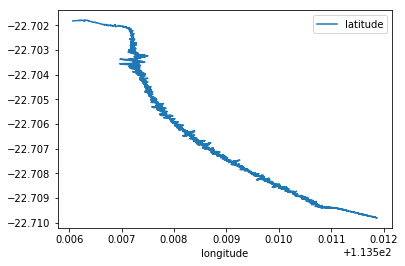

In [209]:
hsv_position.plot(x='longitude',y='latitude')

SerialNumber                          Path  \
TimeStamp                                                             
2019-03-28 04:52:01.160  105031003201  E:/HSV/Dig Stills/2019_03_28   
2019-03-28 04:52:06.110  105031003201  E:/HSV/Dig Stills/2019_03_28   
2019-03-28 04:57:21.120  105031003201  E:/HSV/Dig Stills/2019_03_28   
2019-03-28 04:57:26.080  105031003201  E:/HSV/Dig Stills/2019_03_28   
2019-03-28 04:57:31.120  105031003201  E:/HSV/Dig Stills/2019_03_28   
2019-03-28 04:57:36.090  105031003201  E:/HSV/Dig Stills/2019_03_28   
2019-03-28 04:57:41.140  105031003201  E:/HSV/Dig Stills/2019_03_28   
2019-03-28 04:57:46.100  105031003201  E:/HSV/Dig Stills/2019_03_28   
2019-03-28 04:57:51.140  105031003201  E:/HSV/Dig Stills/2019_03_28   
2019-03-28 04:57:56.110  105031003201  E:/HSV/Dig Stills/2019_03_28   
2019-03-28 04:58:01.150  105031003201  E:/HSV/Dig Stills/2019_03_28   
2019-03-28 04:58:06.120  105031003201  E:/HSV/Dig Stills/2019_03_28   
2019-03-28 04:58:11.070  105031003201  E:/HSV/Dig Stills/2019_03_28   
2019-03-28 04:58:16.130  105031003201  E:/HSV/Dig Stills/2019_03_28   
2019-03-28 04:58:21.090  105031003201  E:/HSV/Dig Stills/2019_03_28   
2019-03-28 04:58:26.140  105031003201  E:/HSV/Dig Stills/2019_03_28   
2019-03-28 04:58:31.090  105031003201  E:/HSV/Dig Stills/2019_03_28   
2019-03-28 04:58:36.140  105031003201  E:/HSV/Dig Stills/2019_03_28   
2019-03-28 04:58:41.110  105031003201  E:/HSV/Dig Stills/2019_03_28   
2019-03-28 04:58:46.160  105031003201  E:/HSV/Dig Stills/2019_03_28   
2019-03-28 04:58:51.120  105031003201  E:/HSV/Dig Stills/2019_03_28   
2019-03-28 04:58:56.090  105031003201  E:/HSV/Dig Stills/2019_03_28   
2019-03-28 04:59:01.130  105031003201  E:/HSV/Dig Stills/2019_03_28   
2019-03-28 04:59:06.100  105031003201  E:/HSV/Dig Stills/2019_03_28   
2019-03-28 04:59:11.140  105031003201  E:/HSV/Dig Stills/2019_03_28   
2019-03-28 04:59:16.110  105031003201  E:/HSV/Dig Stills/2019_03_28   
2019-03-28 04:59:21.150  105031003201  E:/HSV/Dig Stills/2019_03_28   
2019-03-28 04:59:26.120  105031003201  E:/HSV/Dig Stills/2019_03_28   
2019-03-28 04:59:31.160  105031003201  E:/HSV/Dig Stills/2019_03_28   
2019-03-28 04:59:36.130  105031003201  E:/HSV/Dig Stills/2019_03_28   
...                               ...                           ...   
2019-03-30 04:18:35.800  105031003201  E:/HSV/Dig Stills/2019_03_30   
2019-03-30 04:18:40.850  105031003201  E:/HSV/Dig Stills/2019_03_30   
2019-03-30 04:18:45.800  105031003201  E:/HSV/Dig Stills/2019_03_30   
2019-03-30 04:18:50.860  105031003201  E:/HSV/Dig Stills/2019_03_30   
2019-03-30 04:18:55.820  105031003201  E:/HSV/Dig Stills/2019_03_30   
2019-03-30 04:19:00.870  105031003201  E:/HSV/Dig Stills/2019_03_30   
2019-03-30 04:19:05.820  105031003201  E:/HSV/Dig Stills/2019_03_30   
2019-03-30 04:19:10.800  105031003201  E:/HSV/Dig Stills/2019_03_30   
2019-03-30 04:19:15.840  105031003201  E:/HSV/Dig Stills/2019_03_30   
2019-03-30 04:19:20.800  105031003201  E:/HSV/Dig Stills/2019_03_30   
2019-03-30 04:19:25.840  105031003201  E:/HSV/Dig Stills/2019_03_30   
2019-03-30 04:19:30.820  105031003201  E:/HSV/Dig Stills/2019_03_30   
2019-03-30 04:19:35.860  105031003201  E:/HSV/Dig Stills/2019_03_30   
2019-03-30 04:19:40.830  105031003201  E:/HSV/Dig Stills/2019_03_30   
2019-03-30 04:19:45.860  105031003201  E:/HSV/Dig Stills/2019_03_30   
2019-03-30 04:19:50.840  105031003201  E:/HSV/Dig Stills/2019_03_30   
2019-03-30 04:19:55.800  105031003201  E:/HSV/Dig Stills/2019_03_30   
2019-03-30 04:20:00.850  105031003201  E:/HSV/Dig Stills/2019_03_30   
2019-03-30 04:20:05.820  105031003201  E:/HSV/Dig Stills/2019_03_30   
2019-03-30 04:20:10.860  105031003201  E:/HSV/Dig Stills/2019_03_30   
2019-03-30 04:20:15.820  105031003201  E:/HSV/Dig Stills/2019_03_30   
2019-03-30 04:20:20.870  105031003201  E:/HSV/Dig Stills/2019_03_30   
2019-03-30 04:20:25.830  105031003201  E:/HSV/Dig Stills/2019_03_30   
2019-03-30 04:20:30.880  105031003201  E:/HSV/Dig

In [177]:
start_time[0]

Timestamp('2019-03-28 06:18:46.583000')

In [37]:
import json
count=1
with open(logfiles[0],encoding='ANSII') as f:
    for line in f:
        print(line)
        print (count)
        j_content = json.loads(line)
        count = count +1

{"message":"csiro.project.2803.metadata","data":{"project":"Ningaloo Deep Reefs","vessel":"RV Linnaeus","voyage_number":"LN2019_V05","principal_investigator":"Russ Babcock","camera_system":"Hobart Shallow Video","field_instrumentation":"Karl Forcey","transducer_offset_in_dpt_string?":"0.7","measured_transducer_offset":""},"timestamp":"2019-03-28T06:18:46.583Z"}

1
{"message":"linnaeus.biospherical.surface_reference_par.eng","data":{"values":{"surface_reference_par":"-292.58"},"units":{"surface_reference_par":"umol_m2_sec"}},"timestamp":"2019-03-28T06:18:46.617Z"}

2
{"message":"linnaeus.biospherical.surface_reference_par.raw","data":"","timestamp":"2019-03-28T06:18:46.617Z"}

3
{"message":"linnaeus.biospherical.surface_reference_par.eng","data":{"values":{"surface_reference_par":"2212.12"},"units":{"surface_reference_par":"umol_m2_sec"}},"timestamp":"2019-03-28T06:18:46.742Z"}

4
{"message":"hsv.benthos.altimeter.eng","data":{"values":{"altitude":"99.99"},"units":{"altitude":"metres"}}

802
{"message":"hsv.benthos.altimeter.eng","data":{"values":{"altitude":"67.01"},"units":{"altitude":"metres"}},"timestamp":"2019-03-28T06:19:07.986Z"}

803
{"message":"hsv.benthos.altimeter.raw","data":"R67.01E","timestamp":"2019-03-28T06:19:07.986Z"}

804
{"message":"hsv.pressure.telemetry.eng","data":{"values":{"pressure":"0.31"},"units":{"pressure":"decibars"}},"timestamp":"2019-03-28T06:19:07.986Z"}

805
{"message":"hsv.water_ingress.telemetry.eng","data":{"values":{"water_ingress":"false"},"units":{"water_ingress":"boolean"}},"timestamp":"2019-03-28T06:19:07.986Z"}

806
{"message":"hsv.switch_status.telemetry.eng","data":{"values":[false,false,true,true,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false],"units":{"switch_status":"boolean"}},"timestamp":"2019-03-28T06:19:07.986Z"}

807
{"message":"hsv.main.telemetry.raw","data":"44227,811,344,319,2637,2914,12,0,0,0,

1552
{"message":"linnaeus.furuno.sounder.eng","data":{"values":{"depth":"67.60"},"units":{"depth":"metres"}},"timestamp":"2019-03-28T06:19:27.865Z"}

1553
{"message":"linnaeus.furuno.sounder.raw","data":"$SDDPT,0066.9,000.7*69","timestamp":"2019-03-28T06:19:27.865Z"}

1554
{"message":"linnaeus.biospherical.surface_reference_par.eng","data":{"values":{"surface_reference_par":"-292.58"},"units":{"surface_reference_par":"umol_m2_sec"}},"timestamp":"2019-03-28T06:19:27.867Z"}

1555
{"message":"hsv.benthos.altimeter.eng","data":{"values":{"altitude":"62.91\r\n"},"units":{"altitude":"metres"}},"timestamp":"2019-03-28T06:19:27.925Z"}

1556
{"message":"hsv.benthos.altimeter.raw","data":"R62.91","timestamp":"2019-03-28T06:19:27.925Z"}

1557
{"message":"hsv.sonardyne_scout.calculated_beacon_position.eng","data":{"values":{"latitude":"-22.815510","longitude":"113.634905"},"units":{"latitude":"decimal_degrees","longitude":"decimal_degrees"}},"timestamp":"2019-03-28T06:19:27.961Z"}

1558
{"message"


2302
{"message":"linnaeus.furuno.gps.eng","data":{"values":{"latitude":"-22.818208","longitude":"113.636600","utm_zone":"49","sog":"2.31","cog":"128.01"},"units":{"latitude":"decimal_degrees","longitude":"decimal_degrees","utm_zone":"number","sog":"knots","cog":"degrees"}},"timestamp":"2019-03-28T06:19:47.535Z"}

2303
{"message":"linnaeus.furuno.gps.raw","data":"$GPRMC,061947.00,A,2249.09246375,S,11338.19601650,E,2.31,128.01,280319,0.3,E,A,S*53","timestamp":"2019-03-28T06:19:47.535Z"}

2304
{"message":"hsv.sonardyne_scout.calculated_beacon_position.eng","data":{"values":{"latitude":"-22.818075","longitude":"113.636520"},"units":{"latitude":"decimal_degrees","longitude":"decimal_degrees"}},"timestamp":"2019-03-28T06:19:47.562Z"}

2305
{"message":"linnaeus.biospherical.surface_reference_par.eng","data":{"values":{"surface_reference_par":"-292.58"},"units":{"surface_reference_par":"umol_m2_sec"}},"timestamp":"2019-03-28T06:19:47.618Z"}

2306
{"message":"hsv.seabird.ctd.eng","data":{"valu

{"message":"hsv.sonardyne_scout.calculated_beacon_position.eng","data":{"values":{"latitude":"-22.818203","longitude":"113.636682"},"units":{"latitude":"decimal_degrees","longitude":"decimal_degrees"}},"timestamp":"2019-03-28T06:20:07.161Z"}

3052
{"message":"linnaeus.biospherical.surface_reference_par.eng","data":{"values":{"surface_reference_par":"2208.44"},"units":{"surface_reference_par":"umol_m2_sec"}},"timestamp":"2019-03-28T06:20:07.242Z"}

3053
{"message":"linnaeus.furuno.heading.eng","data":{"values":{"heading":"153.0"},"units":{"heading":"degrees"}},"timestamp":"2019-03-28T06:20:07.242Z"}

3054
{"message":"linnaeus.furuno.heading.raw","data":"$GPHDT,153.0,T*32","timestamp":"2019-03-28T06:20:07.242Z"}

3055
{"message":"hsv.benthos.altimeter.eng","data":{"values":{"altitude":"48.55\r\n"},"units":{"altitude":"metres"}},"timestamp":"2019-03-28T06:20:07.316Z"}

3056
{"message":"hsv.benthos.altimeter.raw","data":"R48.55","timestamp":"2019-03-28T06:20:07.316Z"}

3057
{"message":"hsv

3801
{"message":"linnaeus.biospherical.surface_reference_par.eng","data":{"values":{"surface_reference_par":"2213.47"},"units":{"surface_reference_par":"umol_m2_sec"}},"timestamp":"2019-03-28T06:20:26.742Z"}

3802
{"message":"hsv.sonardyne_scout.calculated_beacon_position.eng","data":{"values":{"latitude":"-22.818123","longitude":"113.636618"},"units":{"latitude":"decimal_degrees","longitude":"decimal_degrees"}},"timestamp":"2019-03-28T06:20:26.761Z"}

3803
{"message":"hsv.benthos.altimeter.eng","data":{"values":{"altitude":"35.44\r\n"},"units":{"altitude":"metres"}},"timestamp":"2019-03-28T06:20:26.767Z"}

3804
{"message":"hsv.benthos.altimeter.raw","data":"R35.44","timestamp":"2019-03-28T06:20:26.767Z"}

3805
{"message":"hsv.seabird.ctd.eng","data":{"values":{"temperature":"26.9888","conductivity":"5.54212","depth":"33.075"},"units":{"temperature":"degrees_celsius","conductivity":"siemens_per_metre","depth":"metres"}},"timestamp":"2019-03-28T06:20:26.767Z"}

3806
{"message":"hsv.seab

4301
{"message":"hsv.sonardyne_scout.calculated_beacon_position.eng","data":{"values":{"latitude":"-22.818140","longitude":"113.636642"},"units":{"latitude":"decimal_degrees","longitude":"decimal_degrees"}},"timestamp":"2019-03-28T06:20:39.762Z"}

4302
{"message":"hsv.seabird.ctd.eng","data":{"values":{"temperature":"26.7922","conductivity":"5.53265","depth":"43.762"},"units":{"temperature":"degrees_celsius","conductivity":"siemens_per_metre","depth":"metres"}},"timestamp":"2019-03-28T06:20:39.790Z"}

4303
{"message":"hsv.seabird.ctd.raw","data":"  26.7922,  5.53265,   43.762","timestamp":"2019-03-28T06:20:39.790Z"}

4304
{"message":"linnaeus.biospherical.surface_reference_par.eng","data":{"values":{"surface_reference_par":"-292.58"},"units":{"surface_reference_par":"umol_m2_sec"}},"timestamp":"2019-03-28T06:20:39.868Z"}

4305
{"message":"linnaeus.furuno.sounder.eng","data":{"values":{"depth":"67.70"},"units":{"depth":"metres"}},"timestamp":"2019-03-28T06:20:39.885Z"}

4306
{"message":


5051
{"message":"hsv.sonardyne_scout.calculated_beacon_position.eng","data":{"values":{"latitude":"-22.818168","longitude":"113.636722"},"units":{"latitude":"decimal_degrees","longitude":"decimal_degrees"}},"timestamp":"2019-03-28T06:20:59.162Z"}

5052
{"message":"linnaeus.biospherical.surface_reference_par.eng","data":{"values":{"surface_reference_par":"2209.39"},"units":{"surface_reference_par":"umol_m2_sec"}},"timestamp":"2019-03-28T06:20:59.243Z"}

5053
{"message":"linnaeus.furuno.heading.eng","data":{"values":{"heading":"158.3"},"units":{"heading":"degrees"}},"timestamp":"2019-03-28T06:20:59.246Z"}

5054
{"message":"linnaeus.furuno.heading.raw","data":"$GPHDT,158.3,T*3A","timestamp":"2019-03-28T06:20:59.246Z"}

5055
{"message":"hsv.benthos.altimeter.eng","data":{"values":{"altitude":"13.98\r\n"},"units":{"altitude":"metres"}},"timestamp":"2019-03-28T06:20:59.321Z"}

5056
{"message":"hsv.benthos.altimeter.raw","data":"R13.98","timestamp":"2019-03-28T06:20:59.321Z"}

5057
{"message

{"message":"linnaeus.biospherical.surface_reference_par.eng","data":{"values":{"surface_reference_par":"2215.21"},"units":{"surface_reference_par":"umol_m2_sec"}},"timestamp":"2019-03-28T06:21:18.492Z"}

5801
{"message":"hsv.benthos.altimeter.eng","data":{"values":{"altitude":"3.12\r\n"},"units":{"altitude":"metres"}},"timestamp":"2019-03-28T06:21:18.528Z"}

5802
{"message":"hsv.benthos.altimeter.raw","data":"R3.12","timestamp":"2019-03-28T06:21:18.528Z"}

5803
{"message":"hsv.pressure.telemetry.eng","data":{"values":{"pressure":"66.96"},"units":{"pressure":"decibars"}},"timestamp":"2019-03-28T06:21:18.528Z"}

5804
{"message":"hsv.water_ingress.telemetry.eng","data":{"values":{"water_ingress":"false"},"units":{"water_ingress":"boolean"}},"timestamp":"2019-03-28T06:21:18.528Z"}

5805
{"message":"hsv.switch_status.telemetry.eng","data":{"values":[true,true,true,true,true,true,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false

6550
{"message":"hsv.benthos.altimeter.eng","data":{"values":{"altitude":"1.16\r\n"},"units":{"altitude":"metres"}},"timestamp":"2019-03-28T06:21:37.734Z"}

6551
{"message":"hsv.benthos.altimeter.raw","data":"R1.16","timestamp":"2019-03-28T06:21:37.734Z"}

6552
{"message":"linnaeus.biospherical.surface_reference_par.eng","data":{"values":{"surface_reference_par":"2214.45"},"units":{"surface_reference_par":"umol_m2_sec"}},"timestamp":"2019-03-28T06:21:37.742Z"}

6553
{"message":"hsv.sonardyne_scout.calculated_beacon_position.eng","data":{"values":{"latitude":"-22.818322","longitude":"113.636892"},"units":{"latitude":"decimal_degrees","longitude":"decimal_degrees"}},"timestamp":"2019-03-28T06:21:37.761Z"}

6554
{"message":"linnaeus.biospherical.surface_reference_par.eng","data":{"values":{"surface_reference_par":"-292.58"},"units":{"surface_reference_par":"umol_m2_sec"}},"timestamp":"2019-03-28T06:21:37.867Z"}

6555
{"message":"linnaeus.furuno.sounder.eng","data":{"values":{"depth":"67.7

7300
{"message":"hsv.pressure.telemetry.eng","data":{"values":{"pressure":"68.49"},"units":{"pressure":"decibars"}},"timestamp":"2019-03-28T06:21:57.022Z"}

7301
{"message":"hsv.water_ingress.telemetry.eng","data":{"values":{"water_ingress":"false"},"units":{"water_ingress":"boolean"}},"timestamp":"2019-03-28T06:21:57.022Z"}

7302
{"message":"hsv.switch_status.telemetry.eng","data":{"values":[true,true,true,true,true,true,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false],"units":{"switch_status":"boolean"}},"timestamp":"2019-03-28T06:21:57.022Z"}

7303
{"message":"hsv.main.telemetry.raw","data":"44565,1033,343,315,2616,2611,63,0,0,0,,,","timestamp":"2019-03-28T06:21:57.022Z"}

7304
{"message":"linnaeus.sonardyne_scout.usbl.eng","data":{"values":{"usbl_athwart":"X:38.1","usbl_fore_aft":"Y:-79.7","usbl_depth":"D:70.4"},"units":{"usbl_athwart":"metres_stbd_+ve","usbl_fore_aft":"metre


8050
{"message":"hsv.sonardyne_scout.calculated_beacon_position.eng","data":{"values":{"latitude":"-22.818527","longitude":"113.637085"},"units":{"latitude":"decimal_degrees","longitude":"decimal_degrees"}},"timestamp":"2019-03-28T06:22:16.361Z"}

8051
{"message":"linnaeus.biospherical.surface_reference_par.eng","data":{"values":{"surface_reference_par":"-292.58"},"units":{"surface_reference_par":"umol_m2_sec"}},"timestamp":"2019-03-28T06:22:16.367Z"}

8052
{"message":"hsv.seabird.ctd.eng","data":{"values":{"temperature":"25.1855","conductivity":"5.34324","depth":"68.314"},"units":{"temperature":"degrees_celsius","conductivity":"siemens_per_metre","depth":"metres"}},"timestamp":"2019-03-28T06:22:16.393Z"}

8053
{"message":"hsv.seabird.ctd.raw","data":"  25.1855,  5.34324,   68.314","timestamp":"2019-03-28T06:22:16.393Z"}

8054
{"message":"hsv.benthos.altimeter.eng","data":{"values":{"altitude":"99.99"},"units":{"altitude":"metres"}},"timestamp":"2019-03-28T06:22:16.475Z"}

8055
{"mess

{"message":"hsv.main.telemetry.raw","data":"44642,1033,345,336,2623,2782,63,0,0,0,,,","timestamp":"2019-03-28T06:22:35.518Z"}

8800
{"message":"linnaeus.furuno.gps.eng","data":{"values":{"latitude":"-22.819309","longitude":"113.637553","utm_zone":"49","sog":"1.25","cog":"112.43"},"units":{"latitude":"decimal_degrees","longitude":"decimal_degrees","utm_zone":"number","sog":"knots","cog":"degrees"}},"timestamp":"2019-03-28T06:22:35.536Z"}

8801
{"message":"linnaeus.furuno.gps.raw","data":"$GPRMC,062235.00,A,2249.15854137,S,11338.25317450,E,1.25,112.43,280319,0.3,E,A,S*58","timestamp":"2019-03-28T06:22:35.536Z"}

8802
{"message":"hsv.sonardyne_scout.calculated_beacon_position.eng","data":{"values":{"latitude":"-22.818655","longitude":"113.637168"},"units":{"latitude":"decimal_degrees","longitude":"decimal_degrees"}},"timestamp":"2019-03-28T06:22:35.561Z"}

8803
{"message":"linnaeus.biospherical.surface_reference_par.eng","data":{"values":{"surface_reference_par":"-292.58"},"units":{"surfa

9549
{"message":"linnaeus.biospherical.surface_reference_par.eng","data":{"values":{"surface_reference_par":"-292.58"},"units":{"surface_reference_par":"umol_m2_sec"}},"timestamp":"2019-03-28T06:22:54.867Z"}

9550
{"message":"hsv.sonardyne_scout.calculated_beacon_position.eng","data":{"values":{"latitude":"-22.818787","longitude":"113.637257"},"units":{"latitude":"decimal_degrees","longitude":"decimal_degrees"}},"timestamp":"2019-03-28T06:22:54.961Z"}

9551
{"message":"hsv.benthos.altimeter.eng","data":{"values":{"altitude":"1.01\r\n"},"units":{"altitude":"metres"}},"timestamp":"2019-03-28T06:22:54.968Z"}

9552
{"message":"hsv.benthos.altimeter.raw","data":"R1.01","timestamp":"2019-03-28T06:22:54.968Z"}

9553
{"message":"hsv.pressure.telemetry.eng","data":{"values":{"pressure":"68.80"},"units":{"pressure":"decibars"}},"timestamp":"2019-03-28T06:22:54.968Z"}

9554
{"message":"hsv.water_ingress.telemetry.eng","data":{"values":{"water_ingress":"false"},"units":{"water_ingress":"boolean"}}

10299
{"message":"linnaeus.biospherical.surface_reference_par.eng","data":{"values":{"surface_reference_par":"-292.58"},"units":{"surface_reference_par":"umol_m2_sec"}},"timestamp":"2019-03-28T06:23:14.117Z"}

10300
{"message":"hsv.sonardyne_scout.calculated_beacon_position.eng","data":{"values":{"latitude":"-22.818930","longitude":"113.637327"},"units":{"latitude":"decimal_degrees","longitude":"decimal_degrees"}},"timestamp":"2019-03-28T06:23:14.161Z"}

10301
{"message":"linnaeus.biospherical.surface_reference_par.eng","data":{"values":{"surface_reference_par":"2225.90"},"units":{"surface_reference_par":"umol_m2_sec"}},"timestamp":"2019-03-28T06:23:14.242Z"}

10302
{"message":"linnaeus.furuno.heading.eng","data":{"values":{"heading":"179.6"},"units":{"heading":"degrees"}},"timestamp":"2019-03-28T06:23:14.249Z"}

10303
{"message":"linnaeus.furuno.heading.raw","data":"$GPHDT,179.6,T*3C","timestamp":"2019-03-28T06:23:14.249Z"}

10304
{"message":"hsv.benthos.altimeter.eng","data":{"values


11049
{"message":"linnaeus.biospherical.surface_reference_par.eng","data":{"values":{"surface_reference_par":"2226.12"},"units":{"surface_reference_par":"umol_m2_sec"}},"timestamp":"2019-03-28T06:23:33.492Z"}

11050
{"message":"linnaeus.furuno.gps.eng","data":{"values":{"latitude":"-22.819707","longitude":"113.637638","utm_zone":"49","sog":"2.16","cog":"176.20"},"units":{"latitude":"decimal_degrees","longitude":"decimal_degrees","utm_zone":"number","sog":"knots","cog":"degrees"}},"timestamp":"2019-03-28T06:23:33.536Z"}

11051
{"message":"linnaeus.furuno.gps.raw","data":"$GPRMC,062333.00,A,2249.18240979,S,11338.25828775,E,2.16,176.20,280319,0.3,E,A,S*58","timestamp":"2019-03-28T06:23:33.536Z"}

11052
{"message":"hsv.benthos.altimeter.eng","data":{"values":{"altitude":"3.41\r\n"},"units":{"altitude":"metres"}},"timestamp":"2019-03-28T06:23:33.546Z"}

11053
{"message":"hsv.benthos.altimeter.raw","data":"R3.41","timestamp":"2019-03-28T06:23:33.546Z"}

11054
{"message":"hsv.pressure.teleme

{"message":"hsv.benthos.altimeter.eng","data":{"values":{"altitude":"1.67\r\n"},"units":{"altitude":"metres"}},"timestamp":"2019-03-28T06:23:52.753Z"}

11799
{"message":"hsv.benthos.altimeter.raw","data":"R1.67","timestamp":"2019-03-28T06:23:52.753Z"}

11800
{"message":"hsv.sonardyne_scout.calculated_beacon_position.eng","data":{"values":{"latitude":"-22.819180","longitude":"113.637485"},"units":{"latitude":"decimal_degrees","longitude":"decimal_degrees"}},"timestamp":"2019-03-28T06:23:52.762Z"}

11801
{"message":"linnaeus.biospherical.surface_reference_par.eng","data":{"values":{"surface_reference_par":"-292.58"},"units":{"surface_reference_par":"umol_m2_sec"}},"timestamp":"2019-03-28T06:23:52.868Z"}

11802
{"message":"hsv.sonardyne_scout.calculated_beacon_position.eng","data":{"values":{"latitude":"-22.819180","longitude":"113.637485"},"units":{"latitude":"decimal_degrees","longitude":"decimal_degrees"}},"timestamp":"2019-03-28T06:23:52.962Z"}

11803
{"message":"linnaeus.biospherical

12548
{"message":"hsv.water_ingress.telemetry.eng","data":{"values":{"water_ingress":"false"},"units":{"water_ingress":"boolean"}},"timestamp":"2019-03-28T06:24:12.041Z"}

12549
{"message":"hsv.switch_status.telemetry.eng","data":{"values":[true,true,true,true,true,true,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false],"units":{"switch_status":"boolean"}},"timestamp":"2019-03-28T06:24:12.041Z"}

12550
{"message":"hsv.main.telemetry.raw","data":"44835,1030,348,317,2613,2595,63,0,0,0,,,","timestamp":"2019-03-28T06:24:12.041Z"}

12551
{"message":"linnaeus.biospherical.surface_reference_par.eng","data":{"values":{"surface_reference_par":"-292.58"},"units":{"surface_reference_par":"umol_m2_sec"}},"timestamp":"2019-03-28T06:24:12.117Z"}

12552
{"message":"hsv.sonardyne_scout.calculated_beacon_position.eng","data":{"values":{"latitude":"-22.819320","longitude":"113.637515"},"units":{"lat

13298
{"message":"linnaeus.biospherical.surface_reference_par.eng","data":{"values":{"surface_reference_par":"-292.58"},"units":{"surface_reference_par":"umol_m2_sec"}},"timestamp":"2019-03-28T06:24:31.367Z"}

13299
{"message":"hsv.benthos.altimeter.eng","data":{"values":{"altitude":"1.24\r\n"},"units":{"altitude":"metres"}},"timestamp":"2019-03-28T06:24:31.410Z"}

13300
{"message":"hsv.benthos.altimeter.raw","data":"R1.24","timestamp":"2019-03-28T06:24:31.410Z"}

13301
{"message":"linnaeus.biospherical.surface_reference_par.eng","data":{"values":{"surface_reference_par":"2225.55"},"units":{"surface_reference_par":"umol_m2_sec"}},"timestamp":"2019-03-28T06:24:31.492Z"}

13302
{"message":"hsv.pressure.telemetry.eng","data":{"values":{"pressure":"67.88"},"units":{"pressure":"decibars"}},"timestamp":"2019-03-28T06:24:31.492Z"}

13303
{"message":"hsv.water_ingress.telemetry.eng","data":{"values":{"water_ingress":"false"},"units":{"water_ingress":"boolean"}},"timestamp":"2019-03-28T06:24:31


14048
{"message":"linnaeus.furuno.gps.raw","data":"$GPRMC,062450.00,A,2249.21872968,S,11338.25698731,E,1.84,173.70,280319,0.3,E,A,S*56","timestamp":"2019-03-28T06:24:50.538Z"}

14049
{"message":"linnaeus.sonardyne_scout.usbl.eng","data":{"values":{"usbl_athwart":"X:15.8","usbl_fore_aft":"Y:-74.0","usbl_depth":"D:70.6"},"units":{"usbl_athwart":"metres_stbd_+ve","usbl_fore_aft":"metres_fwd_+ve","usbl_depth":"metres"}},"timestamp":"2019-03-28T06:24:50.551Z"}

14050
{"message":"linnaeus.sonardyne_scout.usbl.raw","data":"\r28 Mar 19 06:24:48:270 B:1 X:15.8 Y:-74.0 D:70.6 P:-1.1 R:-4.0 H:178.4 E:0\n","timestamp":"2019-03-28T06:24:50.551Z"}

14051
{"message":"hsv.sonardyne_scout.calculated_beacon_position.eng","data":{"values":{"latitude":"-22.819633","longitude":"113.637537"},"units":{"latitude":"decimal_degrees","longitude":"decimal_degrees"}},"timestamp":"2019-03-28T06:24:50.561Z"}

14052
{"message":"linnaeus.biospherical.surface_reference_par.eng","data":{"values":{"surface_reference_par

{"message":"linnaeus.furuno.sounder.eng","data":{"values":{"depth":"67.80"},"units":{"depth":"metres"}},"timestamp":"2019-03-28T06:25:09.948Z"}

14798
{"message":"linnaeus.furuno.sounder.raw","data":"$SDDPT,0067.1,000.7*60","timestamp":"2019-03-28T06:25:09.948Z"}

14799
{"message":"hsv.sonardyne_scout.calculated_beacon_position.eng","data":{"values":{"latitude":"-22.819757","longitude":"113.637577"},"units":{"latitude":"decimal_degrees","longitude":"decimal_degrees"}},"timestamp":"2019-03-28T06:25:09.961Z"}

14800
{"message":"hsv.seabird.ctd.eng","data":{"values":{"temperature":"25.1831","conductivity":"5.34177","depth":"67.007"},"units":{"temperature":"degrees_celsius","conductivity":"siemens_per_metre","depth":"metres"}},"timestamp":"2019-03-28T06:25:09.987Z"}

14801
{"message":"hsv.seabird.ctd.raw","data":"  25.1831,  5.34177,   67.007","timestamp":"2019-03-28T06:25:09.987Z"}

14802
{"message":"hsv.benthos.altimeter.eng","data":{"values":{"altitude":"1.72\r\n"},"units":{"altitude":"

15547
{"message":"hsv.main.telemetry.raw","data":"44989,1032,347,318,2622,2788,63,0,0,0,,,","timestamp":"2019-03-28T06:25:29.031Z"}

15548
{"message":"linnaeus.biospherical.surface_reference_par.eng","data":{"values":{"surface_reference_par":"-292.58"},"units":{"surface_reference_par":"umol_m2_sec"}},"timestamp":"2019-03-28T06:25:29.117Z"}

15549
{"message":"hsv.sonardyne_scout.calculated_beacon_position.eng","data":{"values":{"latitude":"-22.819915","longitude":"113.637573"},"units":{"latitude":"decimal_degrees","longitude":"decimal_degrees"}},"timestamp":"2019-03-28T06:25:29.161Z"}

15550
{"message":"hsv.benthos.altimeter.eng","data":{"values":{"altitude":"1.22\r\n"},"units":{"altitude":"metres"}},"timestamp":"2019-03-28T06:25:29.193Z"}

15551
{"message":"hsv.benthos.altimeter.raw","data":"R1.22","timestamp":"2019-03-28T06:25:29.193Z"}

15552
{"message":"linnaeus.biospherical.surface_reference_par.eng","data":{"values":{"surface_reference_par":"2226.49"},"units":{"surface_reference_p

16297
{"message":"linnaeus.biospherical.surface_reference_par.eng","data":{"values":{"surface_reference_par":"-292.58"},"units":{"surface_reference_par":"umol_m2_sec"}},"timestamp":"2019-03-28T06:25:48.367Z"}

16298
{"message":"hsv.benthos.altimeter.eng","data":{"values":{"altitude":"1.23\r\n"},"units":{"altitude":"metres"}},"timestamp":"2019-03-28T06:25:48.400Z"}

16299
{"message":"hsv.benthos.altimeter.raw","data":"R1.23","timestamp":"2019-03-28T06:25:48.400Z"}

16300
{"message":"hsv.pressure.telemetry.eng","data":{"values":{"pressure":"67.26"},"units":{"pressure":"decibars"}},"timestamp":"2019-03-28T06:25:48.480Z"}

16301
{"message":"hsv.water_ingress.telemetry.eng","data":{"values":{"water_ingress":"false"},"units":{"water_ingress":"boolean"}},"timestamp":"2019-03-28T06:25:48.480Z"}

16302
{"message":"hsv.switch_status.telemetry.eng","data":{"values":[true,true,true,true,true,true,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,


17047
{"message":"hsv.benthos.altimeter.eng","data":{"values":{"altitude":"1.24\r\n"},"units":{"altitude":"metres"}},"timestamp":"2019-03-28T06:26:07.606Z"}

17048
{"message":"hsv.benthos.altimeter.raw","data":"R1.24","timestamp":"2019-03-28T06:26:07.606Z"}

17049
{"message":"linnaeus.biospherical.surface_reference_par.eng","data":{"values":{"surface_reference_par":"-292.58"},"units":{"surface_reference_par":"umol_m2_sec"}},"timestamp":"2019-03-28T06:26:07.617Z"}

17050
{"message":"linnaeus.biospherical.surface_reference_par.eng","data":{"values":{"surface_reference_par":"2223.62"},"units":{"surface_reference_par":"umol_m2_sec"}},"timestamp":"2019-03-28T06:26:07.742Z"}

17051
{"message":"hsv.sonardyne_scout.calculated_beacon_position.eng","data":{"values":{"latitude":"-22.820212","longitude":"113.637562"},"units":{"latitude":"decimal_degrees","longitude":"decimal_degrees"}},"timestamp":"2019-03-28T06:26:07.761Z"}

17052
{"message":"hsv.benthos.altimeter.eng","data":{"values":{"altitud

{"message":"hsv.seabird.ctd.raw","data":"  25.1824,  5.34183,   67.307","timestamp":"2019-03-28T06:26:26.977Z"}

17797
{"message":"linnaeus.biospherical.surface_reference_par.eng","data":{"values":{"surface_reference_par":"2225.74"},"units":{"surface_reference_par":"umol_m2_sec"}},"timestamp":"2019-03-28T06:26:26.992Z"}

17798
{"message":"hsv.pressure.telemetry.eng","data":{"values":{"pressure":"67.88"},"units":{"pressure":"decibars"}},"timestamp":"2019-03-28T06:26:27.057Z"}

17799
{"message":"hsv.water_ingress.telemetry.eng","data":{"values":{"water_ingress":"false"},"units":{"water_ingress":"boolean"}},"timestamp":"2019-03-28T06:26:27.057Z"}

17800
{"message":"hsv.switch_status.telemetry.eng","data":{"values":[true,true,true,true,true,true,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false],"units":{"switch_status":"boolean"}},"timestamp":"2019-03-28T06:26:27.057Z"}

17801
{"messa

18546
{"message":"linnaeus.furuno.heading.eng","data":{"values":{"heading":"187.6"},"units":{"heading":"degrees"}},"timestamp":"2019-03-28T06:26:46.258Z"}

18547
{"message":"linnaeus.furuno.heading.raw","data":"$GPHDT,187.6,T*3D","timestamp":"2019-03-28T06:26:46.258Z"}

18548
{"message":"hsv.sonardyne_scout.calculated_beacon_position.eng","data":{"values":{"latitude":"-22.820500","longitude":"113.637540"},"units":{"latitude":"decimal_degrees","longitude":"decimal_degrees"}},"timestamp":"2019-03-28T06:26:46.362Z"}

18549
{"message":"linnaeus.biospherical.surface_reference_par.eng","data":{"values":{"surface_reference_par":"-292.58"},"units":{"surface_reference_par":"umol_m2_sec"}},"timestamp":"2019-03-28T06:26:46.368Z"}

18550
{"message":"hsv.benthos.altimeter.eng","data":{"values":{"altitude":"1.04\r\n"},"units":{"altitude":"metres"}},"timestamp":"2019-03-28T06:26:46.427Z"}

18551
{"message":"hsv.benthos.altimeter.raw","data":"R1.04","timestamp":"2019-03-28T06:26:46.427Z"}

18552
{"mes

19296
{"message":"hsv.switch_status.telemetry.eng","data":{"values":[true,true,true,true,true,true,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false],"units":{"switch_status":"boolean"}},"timestamp":"2019-03-28T06:27:05.553Z"}

19297
{"message":"hsv.main.telemetry.raw","data":"45182,1030,348,318,2622,2784,63,0,0,0,,,","timestamp":"2019-03-28T06:27:05.553Z"}

19298
{"message":"hsv.sonardyne_scout.calculated_beacon_position.eng","data":{"values":{"latitude":"-22.820640","longitude":"113.637522"},"units":{"latitude":"decimal_degrees","longitude":"decimal_degrees"}},"timestamp":"2019-03-28T06:27:05.562Z"}

19299
{"message":"linnaeus.biospherical.surface_reference_par.eng","data":{"values":{"surface_reference_par":"-292.58"},"units":{"surface_reference_par":"umol_m2_sec"}},"timestamp":"2019-03-28T06:27:05.618Z"}

19300
{"message":"hsv.benthos.altimeter.eng","data":{"values":{"altitude":


20046
{"message":"hsv.sonardyne_scout.calculated_beacon_position.eng","data":{"values":{"latitude":"-22.820795","longitude":"113.637523"},"units":{"latitude":"decimal_degrees","longitude":"decimal_degrees"}},"timestamp":"2019-03-28T06:27:24.761Z"}

20047
{"message":"hsv.benthos.altimeter.eng","data":{"values":{"altitude":"1.38\r\n"},"units":{"altitude":"metres"}},"timestamp":"2019-03-28T06:27:24.840Z"}

20048
{"message":"hsv.benthos.altimeter.raw","data":"R1.38","timestamp":"2019-03-28T06:27:24.840Z"}

20049
{"message":"linnaeus.biospherical.surface_reference_par.eng","data":{"values":{"surface_reference_par":"-292.58"},"units":{"surface_reference_par":"umol_m2_sec"}},"timestamp":"2019-03-28T06:27:24.867Z"}

20050
{"message":"hsv.sonardyne_scout.calculated_beacon_position.eng","data":{"values":{"latitude":"-22.820795","longitude":"113.637523"},"units":{"latitude":"decimal_degrees","longitude":"decimal_degrees"}},"timestamp":"2019-03-28T06:27:24.961Z"}

20051
{"message":"linnaeus.biosp

{"message":"hsv.pressure.telemetry.eng","data":{"values":{"pressure":"67.88"},"units":{"pressure":"decibars"}},"timestamp":"2019-03-28T06:27:44.048Z"}

20796
{"message":"hsv.water_ingress.telemetry.eng","data":{"values":{"water_ingress":"false"},"units":{"water_ingress":"boolean"}},"timestamp":"2019-03-28T06:27:44.048Z"}

20797
{"message":"hsv.switch_status.telemetry.eng","data":{"values":[true,true,true,true,true,true,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false],"units":{"switch_status":"boolean"}},"timestamp":"2019-03-28T06:27:44.048Z"}

20798
{"message":"hsv.main.telemetry.raw","data":"45259,1031,348,316,2623,2792,63,0,0,0,,,","timestamp":"2019-03-28T06:27:44.048Z"}

20799
{"message":"linnaeus.biospherical.surface_reference_par.eng","data":{"values":{"surface_reference_par":"-292.58"},"units":{"surface_reference_par":"umol_m2_sec"}},"timestamp":"2019-03-28T06:27:44.117Z"}


21545
{"message":"hsv.sonardyne_scout.calculated_beacon_position.eng","data":{"values":{"latitude":"-22.821068","longitude":"113.637530"},"units":{"latitude":"decimal_degrees","longitude":"decimal_degrees"}},"timestamp":"2019-03-28T06:28:03.361Z"}

21546
{"message":"linnaeus.biospherical.surface_reference_par.eng","data":{"values":{"surface_reference_par":"-292.58"},"units":{"surface_reference_par":"umol_m2_sec"}},"timestamp":"2019-03-28T06:28:03.367Z"}

21547
{"message":"hsv.benthos.altimeter.eng","data":{"values":{"altitude":"1.91\r\n"},"units":{"altitude":"metres"}},"timestamp":"2019-03-28T06:28:03.417Z"}

21548
{"message":"hsv.benthos.altimeter.raw","data":"R1.91","timestamp":"2019-03-28T06:28:03.417Z"}

21549
{"message":"linnaeus.biospherical.surface_reference_par.eng","data":{"values":{"surface_reference_par":"2205.45"},"units":{"surface_reference_par":"umol_m2_sec"}},"timestamp":"2019-03-28T06:28:03.492Z"}

21550
{"message":"hsv.pressure.telemetry.eng","data":{"values":{"pressur

22295
{"message":"hsv.pressure.telemetry.eng","data":{"values":{"pressure":"66.65"},"units":{"pressure":"decibars"}},"timestamp":"2019-03-28T06:28:22.542Z"}

22296
{"message":"hsv.water_ingress.telemetry.eng","data":{"values":{"water_ingress":"false"},"units":{"water_ingress":"boolean"}},"timestamp":"2019-03-28T06:28:22.542Z"}

22297
{"message":"hsv.switch_status.telemetry.eng","data":{"values":[true,true,true,true,true,true,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false],"units":{"switch_status":"boolean"}},"timestamp":"2019-03-28T06:28:22.542Z"}

22298
{"message":"hsv.main.telemetry.raw","data":"45336,1027,346,316,2622,2719,63,0,0,0,,,","timestamp":"2019-03-28T06:28:22.542Z"}

22299
{"message":"hsv.sonardyne_scout.calculated_beacon_position.eng","data":{"values":{"latitude":"-22.821233","longitude":"113.637540"},"units":{"latitude":"decimal_degrees","longitude":"decimal_degree


23045
{"message":"hsv.benthos.altimeter.raw","data":"R1.97","timestamp":"2019-03-28T06:28:41.830Z"}

23046
{"message":"linnaeus.biospherical.surface_reference_par.eng","data":{"values":{"surface_reference_par":"-292.58"},"units":{"surface_reference_par":"umol_m2_sec"}},"timestamp":"2019-03-28T06:28:41.867Z"}

23047
{"message":"hsv.sonardyne_scout.calculated_beacon_position.eng","data":{"values":{"latitude":"-22.821372","longitude":"113.637598"},"units":{"latitude":"decimal_degrees","longitude":"decimal_degrees"}},"timestamp":"2019-03-28T06:28:41.961Z"}

23048
{"message":"linnaeus.biospherical.surface_reference_par.eng","data":{"values":{"surface_reference_par":"2212.20"},"units":{"surface_reference_par":"umol_m2_sec"}},"timestamp":"2019-03-28T06:28:41.992Z"}

23049
{"message":"linnaeus.furuno.sounder.eng","data":{"values":{"depth":"67.50"},"units":{"depth":"metres"}},"timestamp":"2019-03-28T06:28:42.001Z"}

23050
{"message":"linnaeus.furuno.sounder.raw","data":"$SDDPT,0066.8,000.7*68"

{"message":"hsv.seabird.ctd.eng","data":{"values":{"temperature":"25.1823","conductivity":"5.34188","depth":"67.076"},"units":{"temperature":"degrees_celsius","conductivity":"siemens_per_metre","depth":"metres"}},"timestamp":"2019-03-28T06:29:01.038Z"}

23795
{"message":"hsv.seabird.ctd.raw","data":"  25.1823,  5.34188,   67.076","timestamp":"2019-03-28T06:29:01.038Z"}

23796
{"message":"linnaeus.biospherical.surface_reference_par.eng","data":{"values":{"surface_reference_par":"-292.58"},"units":{"surface_reference_par":"umol_m2_sec"}},"timestamp":"2019-03-28T06:29:01.118Z"}

23797
{"message":"hsv.sonardyne_scout.calculated_beacon_position.eng","data":{"values":{"latitude":"-22.821497","longitude":"113.637663"},"units":{"latitude":"decimal_degrees","longitude":"decimal_degrees"}},"timestamp":"2019-03-28T06:29:01.161Z"}

23798
{"message":"linnaeus.biospherical.surface_reference_par.eng","data":{"values":{"surface_reference_par":"2216.33"},"units":{"surface_reference_par":"umol_m2_sec"}}

24544
{"message":"hsv.benthos.altimeter.eng","data":{"values":{"altitude":"1.56\r\n"},"units":{"altitude":"metres"}},"timestamp":"2019-03-28T06:29:20.489Z"}

24545
{"message":"hsv.benthos.altimeter.raw","data":"R1.56","timestamp":"2019-03-28T06:29:20.489Z"}

24546
{"message":"linnaeus.biospherical.surface_reference_par.eng","data":{"values":{"surface_reference_par":"2212.35"},"units":{"surface_reference_par":"umol_m2_sec"}},"timestamp":"2019-03-28T06:29:20.493Z"}

24547
{"message":"linnaeus.furuno.gps.eng","data":{"values":{"latitude":"-22.822272","longitude":"113.638128","utm_zone":"49","sog":"1.88","cog":"147.39"},"units":{"latitude":"decimal_degrees","longitude":"decimal_degrees","utm_zone":"number","sog":"knots","cog":"degrees"}},"timestamp":"2019-03-28T06:29:20.540Z"}

24548
{"message":"linnaeus.furuno.gps.raw","data":"$GPRMC,062920.00,A,2249.33632314,S,11338.28765775,E,1.88,147.39,280319,0.3,E,A,S*5C","timestamp":"2019-03-28T06:29:20.540Z"}

24549
{"message":"hsv.sonardyne_scout.

25294
{"message":"hsv.sonardyne_scout.calculated_beacon_position.eng","data":{"values":{"latitude":"-22.821748","longitude":"113.637835"},"units":{"latitude":"decimal_degrees","longitude":"decimal_degrees"}},"timestamp":"2019-03-28T06:29:39.561Z"}

25295
{"message":"linnaeus.biospherical.surface_reference_par.eng","data":{"values":{"surface_reference_par":"-292.58"},"units":{"surface_reference_par":"umol_m2_sec"}},"timestamp":"2019-03-28T06:29:39.618Z"}

25296
{"message":"hsv.benthos.altimeter.eng","data":{"values":{"altitude":"1.89\r\n"},"units":{"altitude":"metres"}},"timestamp":"2019-03-28T06:29:39.696Z"}

25297
{"message":"hsv.benthos.altimeter.raw","data":"R1.89","timestamp":"2019-03-28T06:29:39.696Z"}

25298
{"message":"linnaeus.biospherical.surface_reference_par.eng","data":{"values":{"surface_reference_par":"2213.98"},"units":{"surface_reference_par":"umol_m2_sec"}},"timestamp":"2019-03-28T06:29:39.743Z"}

25299
{"message":"hsv.sonardyne_scout.calculated_beacon_position.eng","d


26044
{"message":"hsv.sonardyne_scout.calculated_beacon_position.eng","data":{"values":{"latitude":"-22.821857","longitude":"113.637915"},"units":{"latitude":"decimal_degrees","longitude":"decimal_degrees"}},"timestamp":"2019-03-28T06:29:58.962Z"}

26045
{"message":"linnaeus.biospherical.surface_reference_par.eng","data":{"values":{"surface_reference_par":"2208.68"},"units":{"surface_reference_par":"umol_m2_sec"}},"timestamp":"2019-03-28T06:29:58.994Z"}

26046
{"message":"hsv.benthos.altimeter.eng","data":{"values":{"altitude":"2.08\r\n"},"units":{"altitude":"metres"}},"timestamp":"2019-03-28T06:29:59.065Z"}

26047
{"message":"hsv.benthos.altimeter.raw","data":"R2.08","timestamp":"2019-03-28T06:29:59.065Z"}

26048
{"message":"hsv.pressure.telemetry.eng","data":{"values":{"pressure":"67.26"},"units":{"pressure":"decibars"}},"timestamp":"2019-03-28T06:29:59.065Z"}

26049
{"message":"hsv.water_ingress.telemetry.eng","data":{"values":{"water_ingress":"false"},"units":{"water_ingress":"boo

JSONDecodeError: Invalid control character at: line 1 column 48 (char 47)

In [64]:
chunk=pd.read_json(r'E:\HSV\Log Files\HSV_LN2019_V05_2818_2019_03_28_04_51_36_clean.json',lines=True)

In [65]:
chunk

data  \
0      {'project': 'Ningaloo Deep Reefs', 'vessel': '...   
1      {'values': {'surface_reference_par': '-292.58'...   
2      {'values': {'pressure': '0.00'}, 'units': {'pr...   
3      {'values': {'water_ingress': 'false'}, 'units'...   
4      {'values': [False, True, True, True, False, Fa...   
5                33725,810,345,318,2632,2897,14,0,0,0,,,   
6      {'values': {'latitude': 'null', 'longitude': '...   
7      {'values': {'temperature': '30.7360', 'conduct...   
8                            30.7360,  0.00011,   -0.073   
9      {'values': {'altitude': '99.99'}, 'units': {'a...   
10                                               R99.99E   
11     {'values': {'latitude': '-22.709880', 'longitu...   
12     $GPRMC,045136.00,A,2242.59278167,S,11330.72900...   
13     {'values': {'latitude': 'null', 'longitude': '...   
14     {'values': {'altitude': '99.99'}, 'units': {'a...   
15                                               R99.99E   
16     {'values': {'latitude': 'null', 'longitude': '...   
17     {'values': {'altitude': '99.99'}, 'units': {'a...   
18                                               R99.99E   
19     {'values': {'pressure': '0.00'}, 'units': {'pr...   
20     {'values': {'water_ingress': 'false'}, 'units'...   
21     {'values': [False, True, True, True, False, Fa...   
22               33726,810,343,315,2634,2898,14,0,0,0,,,   
23     {'values': {'cable_impedence': '1000,1', 'eart...   
24     !; ;4000,0;0000;1000,1; 0234;-0002;+0002;+000;...   
25     {'values': {'latitude': 'null', 'longitude': '...   
26     {'values': {'altitude': '99.99'}, 'units': {'a...   
27                                               R99.99E   
28     {'values': {'heading': '348.3'}, 'units': {'he...   
29                                     $GPHDT,348.3,T*39   
...                                                  ...   
54069  {'values': {'pressure': '-0.31'}, 'units': {'p...   
54070  {'values': {'water_ingress': 'false'}, 'units'...   
54071  {'values': [False, False, True, True, False, F...   
54072            37028,809,343,314,2627,2916,12,0,0,0,,,   
54073  {'values': {'heading': '349.3'}, 'units': {'he...   
54074                                  $GPHDT,349.3,T*38   
54075  {'values': {'latitude': '-22.701825', 'longitu...   
54076  {'values': {'altitude': '99.99'}, 'units': {'a...   
54077                                            R99.99E   
54078  {'values': {'depth': '205.40'}, 'units': {'dep...   
54079                             $SDDPT,0204.7,000.7*61   
54080  {'values': {'altitude': '99.99'}, 'units': {'a...   
54081                                            R99.99E   
54082  {'values': {'latitude': '-22.701825', 'longitu...   
54083  {'values': {'cable_impedence': '1000,1', 'eart...   
54084  !; ;4000,0;0000;1000,1; 0234;+0000;+0000;+000;...   
54085  {'values': {'latitude': '-22.701724', 'longitu...   
54086  $GPRMC,051908.00,A,2242.10343677,S,11330.36311...   
54087  {'values': {'pressure': '-0.31'}, 'units': {'p...   
54088  {'values': {'water_ingress': 'false'}, 'units'...   
54089  {'values': [False, False, True, True, False, F...   
54090            37029,809,344,316,2625,2916,12,0,0,0,,,   
54091  {'values': {'latitude': '-22.701825', 'longitu...   
54092  {'values': {'altitude': '99.99'}, 'units': {'a...   
54093                                            R99.99E   
54094  {'values': {'altitude': '99.99'}, 'units': {'a...   
54095                                            R99.99E   
54096  {'values': {'latitude': '-22.701825', 'longitu...   
54097  {'values': {'temperature': '27.2004', 'conduct...   
54098                        27.2004,  0.81359,   -0.099   

                                                 message  \
0                            csiro.project.2818.metadata   
1        linnaeus.biospherical.surface_reference_par.eng   
2                             hsv.pressure.telemetry.eng   
3                        hsv.water_ingress.telemetry.eng   
4                        hsv.sw

In [54]:
json.loads('{"message":"linnaeus.furuno.gps.raw","data":"$GPRMC,045145.00,A,2242.58976917,S,11330.72565402,E,1.67,307.18,280319,0.3,E,A,S*50","timestamp":"2019-03-28T04:51:45.480Z"}')

{'message': 'linnaeus.furuno.gps.raw',
 'data': '$GPRMC,045145.00,A,2242.58976917,S,11330.72565402,E,1.67,307.18,280319,0.3,E,A,S*50',
 'timestamp': '2019-03-28T04:51:45.480Z'}

In [33]:
logfiles[2]

'E:\\HSV\\Log Files\\clean\\HSV_LN2019_V05_2803_2019_03_28_06_18_46.json'

In [57]:
from uvsp.logfile import LogFile
LogFile(logfiles[0]).load()

IndexError: single positional indexer is out-of-bounds